<a href="https://colab.research.google.com/github/AriadniTzanaki/datastories_for_emme/blob/main/%CE%91%CF%83%CE%BA%CE%B7%CF%83%CE%B5%CE%B9%CF%82%20week10/Askhseis_lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ασκήσεις για Μάθημα 10**

In [2]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 23.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud, STOPWORDS


In [47]:

nlp = spacy.load('el_core_news_sm')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
skai_df = pd.read_csv("/content/drive/MyDrive/skai.gr-MAY23.csv")

In [7]:
skai_df

,site,url,date,section,title,author,text
0,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-01,Κόσμος,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,ΑΠΕ-ΜΠΕ,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
1,skai.gr,https://www.skai.gr/news/world/meksiko-18-tour...,2023-05-01,Κόσμος,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,ΑΠΕ-ΜΠΕ,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...
2,skai.gr,https://www.skai.gr/news/greece/eortologio-poi...,2023-05-01,Ελλάδα,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά",skai.gr,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της..."
3,skai.gr,https://www.skai.gr/news/world/soudan-i-vretan...,2023-05-01,Κόσμος,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,ΑΠΕ-ΜΠΕ,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...
4,skai.gr,https://www.skai.gr/news/greece/fotia-ta-ksime...,2023-05-01,Ελλάδα,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,skai.gr,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...
...,...,...,...,...,...,...,...
5161,skai.gr,https://www.skai.gr/news/politics/androulakis-...,2023-05-31,Πολιτική,Ανδρουλάκης από Θεσσαλονίκη: Επιδιώκουμε φορολ...,ΑΠΕ-ΜΠΕ,"""Επιδιώκουμε φορολογική δικαιοσύνη και αντιμε..."
5162,skai.gr,https://www.skai.gr/news/sports/apotheosi-vero...,2023-05-31,Αθλητικά,Αποθέωση Βερόν σε Καραγκούνη σε Reunion μέσω Ι...,skai.gr,Ο Γιώργος Καραγκούνης συναντήθηκε με τον παλιό...
5163,skai.gr,https://www.skai.gr/news/world/san-simera-i-la...,2023-05-31,Κόσμος,Σαν σήμερα: Η λαίδη Γκοντάιβα βγήκε γυμνή στον...,skai.gr,Σαν σήμερα - 31 Μαΐου 2023 Ιστορικά και πολιτι...
5164,skai.gr,https://www.skai.gr/news/world/germania-epithy...,2023-05-31,Κόσμος,Το Βερολίνο θέλει «θετικές εξελίξεις» σε Κυπρι...,ΑΠΕ-ΜΠΕ,Το Κυπριακό και οι ελληνοτουρκικές σχέσεις συμ...


In [8]:
skai_df.dropna(inplace=True)

In [11]:
skai_df=skai_df.reset_index(drop=True)

In [12]:
skai_df

,site,url,date,section,title,author,text
0,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-01,Κόσμος,Το Βατικανό συμμετέχει σε ειρηνευτική αποστολή...,ΑΠΕ-ΜΠΕ,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
1,skai.gr,https://www.skai.gr/news/world/meksiko-18-tour...,2023-05-01,Κόσμος,Μεξικό: Τουλάχιστον 18 τουρίστες νεκροί σε δυσ...,ΑΠΕ-ΜΠΕ,Τουλάχιστον δεκαοκτώ μεξικανοί τουρίστες σκοτώ...
2,skai.gr,https://www.skai.gr/news/greece/eortologio-poi...,2023-05-01,Ελλάδα,"Ποιοι γιορτάζουν σήμερα, Πρωτομαγιά",skai.gr,"Του Προφήτου Ιερεμία, του Αγίου Πανάρετου, της..."
3,skai.gr,https://www.skai.gr/news/world/soudan-i-vretan...,2023-05-01,Κόσμος,Σουδάν: Η Βρετανία ανακοίνωσε επιπλέον πτήση γ...,ΑΠΕ-ΜΠΕ,Μολονότι επισήμως η βρετανική κυβέρνηση ολοκλή...
4,skai.gr,https://www.skai.gr/news/greece/fotia-ta-ksime...,2023-05-01,Ελλάδα,Καταστράφηκε ολοσχερώς από φωτιά καφετέρια στη...,skai.gr,Υπό μερικό έλεγχο βρίσκεται πυρκαγιά που ξέσπα...
...,...,...,...,...,...,...,...
4978,skai.gr,https://www.skai.gr/news/politics/androulakis-...,2023-05-31,Πολιτική,Ανδρουλάκης από Θεσσαλονίκη: Επιδιώκουμε φορολ...,ΑΠΕ-ΜΠΕ,"""Επιδιώκουμε φορολογική δικαιοσύνη και αντιμε..."
4979,skai.gr,https://www.skai.gr/news/sports/apotheosi-vero...,2023-05-31,Αθλητικά,Αποθέωση Βερόν σε Καραγκούνη σε Reunion μέσω Ι...,skai.gr,Ο Γιώργος Καραγκούνης συναντήθηκε με τον παλιό...
4980,skai.gr,https://www.skai.gr/news/world/san-simera-i-la...,2023-05-31,Κόσμος,Σαν σήμερα: Η λαίδη Γκοντάιβα βγήκε γυμνή στον...,skai.gr,Σαν σήμερα - 31 Μαΐου 2023 Ιστορικά και πολιτι...
4981,skai.gr,https://www.skai.gr/news/world/germania-epithy...,2023-05-31,Κόσμος,Το Βερολίνο θέλει «θετικές εξελίξεις» σε Κυπρι...,ΑΠΕ-ΜΠΕ,Το Κυπριακό και οι ελληνοτουρκικές σχέσεις συμ...


In [14]:
skai_df.describe()

,site,url,date,section,title,author,text
count,4983,4983,4983,4983,4983,4983,4983
unique,1,4983,31,19,4966,197,4983
top,skai.gr,https://www.skai.gr/news/world/to-vatikano-sym...,2023-05-31,Κόσμος,Ποια γιορτή είναι σήμερα,skai.gr,Το Βατικανό εμπλέκεται σε μια ειρηνευτική αποσ...
freq,4983,1,353,1548,10,2379,1


In [15]:
skai_df.columns

Index(['site', 'url', 'date', 'section', 'title', 'author', 'text'], dtype='object')

In [28]:
skai_df['datetime']=pd.to_datetime(skai_df['date'],format='%Y-%m-%d')


In [30]:
skai_df['year']=pd.DatetimeIndex(skai_df['datetime']).year
skai_df['month']=pd.DatetimeIndex(skai_df['datetime']).month
skai_df['day']=pd.DatetimeIndex(skai_df['datetime']).day


In [33]:
skai_df["full_text"]=skai_df["title"]+" "+skai_df["text"]

In [34]:
skai_df['text'] =skai_df[['title', 'full_text']].agg(' '.join, axis=1)

In [36]:
 skai_df[['date', "section"]].describe()

,date,section
count,4983,4983
unique,31,19
top,2023-05-31,Κόσμος
freq,353,1548


In [41]:
skai_df['datetime'] = pd.to_datetime(skai_df['date'], format='%Y-%m-%d')
skai_df['day'] = pd.DatetimeIndex(skai_df['datetime']).day

In [42]:
skai_df[skai_df["section"]=="Κόσμος"].groupby("day", as_index=False)['title'].count().sort_values("title", ascending=False)

,day,title
30,31,97
11,12,97
4,5,88
22,23,80
3,4,72
9,10,71
20,21,69
14,15,59
25,26,58
24,25,58


In [43]:
skai_df[(skai_df["section"]=="Κόσμος") & (skai_df["day"]==6)]["text"]

734    Live εικόνα από το Λονδίνο - Η ώρα της στέψης ...
739    H ιστορική τελετή στέψης του Κάρολου – Υπερθέα...
745    Σουδάν: Οι εμπόλεμες πλευρές θα συναντηθούν σή...
746    Μπάιντεν: Απών από τη στέψη, αλλά θα συναντήσε...
766    Υεμένη: Δύο στρατιώτες σκοτώθηκαν σε βομβιστικ...
774    Ελβετία: Ο Ζελένσκι θα μιλήσει στο ελβετικό κο...
789    Στέψη Καρόλου: Τα χαρακτηριστικά της τελετής σ...
791    DW: Πώς ο Ερντογάν στοχοποιεί τη ΛΟΑΤΚΙ+ κοινό...
832    Μεσανατολικό: Δύο Παλαιστίνιοι σκοτώθηκαν σε ι...
861    Παραγουάη: Συνελήφθη ο υποψήφιος για την προεδ...
868    Παραδόσεις που χάνονται στα βάθη των αιώνων στ...
873    Νεπάλ: Ένας νεκρός και τέσσερις τραυματίες από...
879    Διαδηλωτές ζητούν δικαιοσύνη για τον άστεγο Αφ...
889    Σουδάν-ΟΗΕ: Περισσότεροι από δύο εκατομμύρια ά...
895    Ο Κάρολος Γ’ στέφθηκε βασιλιάς της Βρετανίας σ...
899    Ουκρανία: Έξι Ουκρανοί ναρκοσυλλέκτες νεκροί α...
901    Βομβιστική επίθεση κατά συγγραφέα Πριλέπιν: Ο ...
902    Ρωσία: Ο Πούτιν δεν έχει

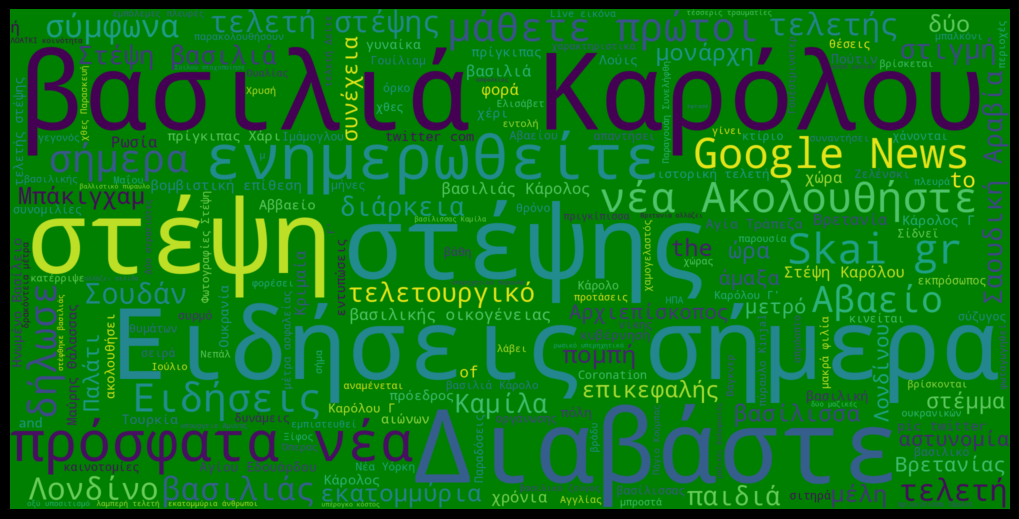

In [52]:
 wordcloud = WordCloud(
     stopwords = nlp.Defaults.stop_words,
     width = 2000,
     height = 1000,
     background_color = 'green'
  ).generate(' '.join(skai_df[(skai_df["section"]=="Κόσμος") & (skai_df["day"]==6)]["text"]))
 fig = plt.figure(
     figsize = (10, 8),
     facecolor = 'k',
     edgecolor = 'k')
 plt.imshow(wordcloud, interpolation = 'bilinear')
 plt.axis('off')
 plt.tight_layout(pad=0)
 plt.show()

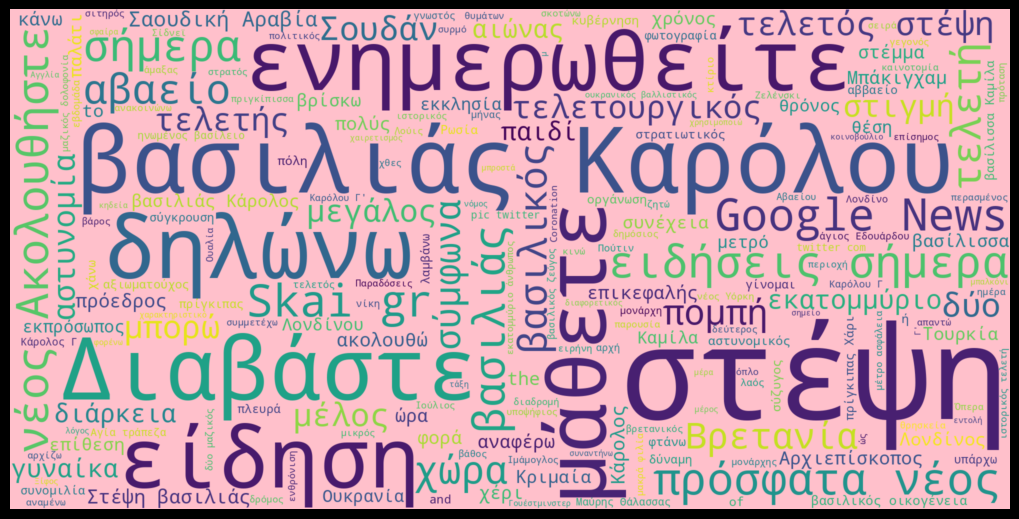

In [50]:
 wordcloud = WordCloud(
     stopwords = nlp.Defaults.stop_words,
     width = 2000,
     height = 1000,
     background_color = 'pink'
  ).generate(' '.join(token.lemma_ for token in nlp(' '.join(skai_df[(skai_df["section"]=="Κόσμος") & (skai_df["day"]==6)]["text"]))))
 fig = plt.figure(
     figsize = (10, 8),
     facecolor = 'k',
     edgecolor = 'k')
 plt.imshow(wordcloud, interpolation = 'bilinear')
 plt.axis('off')
 plt.tight_layout(pad=0)
 plt.show()